## AOI Kurunegala District

This notebook extracts the Area of Interest (AOI) for Kurunegala district from GADM administrative boundaries data.

In [2]:
import geopandas as gpd
import os


In [3]:
# Path to the GADM file
gadm_path = "../AOI/gadm41_LKA.gpkg"

# Load the district/division level layer (ADM_ADM_2)
gdf = gpd.read_file(gadm_path, layer="ADM_ADM_2")

print(f"Loaded {len(gdf)} administrative divisions from Sri Lanka")
print(f"Columns: {list(gdf.columns)}")

# Filter for Kurunegala district (all divisions within Kurunegala)
mask = gdf["NAME_1"].str.lower().str.contains("kurunegala", na=False)
aoi = gdf[mask].to_crs("EPSG:4326")  # ensure WGS84

print(f"\nFound {len(aoi)} divisions in Kurunegala district:")
for division in sorted(aoi['NAME_2'].tolist()):
    print(f"  - {division}")

# Save as GeoJSON for your pipeline
out_path = "../AOI/kurunegala_District_AOI.geojson"
os.makedirs(os.path.dirname(out_path), exist_ok=True)
aoi.to_file(out_path, driver="GeoJSON")
print(f"\n✅ Saved Kurunegala AOI → {out_path}")
print(f"   Area of Interest contains {len(aoi)} administrative divisions")

Loaded 323 administrative divisions from Sri Lanka
Columns: ['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2', 'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2', 'geometry']

Found 30 divisions in Kurunegala district:
  - Alawwa
  - Ambanpola
  - Bamunakotuwa
  - Bingiriya
  - Ehetuwewa
  - Galgamuwa
  - Ganewatta
  - Giribawa
  - Ibbagamuwa
  - Katupotha
  - Kobeigane
  - Kotavehera
  - Kuliyapitiya East
  - Kuliyapitiya West
  - Kurunegala
  - Mahawa
  - Mallawapitiya
  - Maspotha
  - Mawathagama
  - Narammala
  - Nikaweratiya
  - Panduwasnuwara
  - Pannala
  - Polgahawela
  - Polpithigama
  - Rasnayakapura
  - Rideegama
  - Udubaddawa
  - Wariyapola
  - Weerambugedara

✅ Saved Kurunegala AOI → ../AOI/kurunegala_District_AOI.geojson
   Area of Interest contains 30 administrative divisions


In [4]:
# Interactive map visualization using folium
import folium

# Calculate center of the AOI
center_lat = aoi.geometry.centroid.y.mean()
center_lon = aoi.geometry.centroid.x.mean()

# Create a folium map
m = folium.Map(location=[center_lat, center_lon], 
               zoom_start=10,
               tiles='OpenStreetMap')

# Add the AOI to the map
folium.GeoJson(
    aoi,
    name='Kurunegala District',
    style_function=lambda x: {
        'fillColor': 'lightblue',
        'color': 'darkblue',
        'weight': 2,
        'fillOpacity': 0.4
    },
    tooltip=folium.GeoJsonTooltip(fields=['NAME_2'], 
                                    aliases=['Division:'],
                                    style='background-color: white; font-size: 12px;')
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display the map
m

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12176\787329048.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = aoi.geometry.centroid.y.mean()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12176\787329048.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = aoi.geometry.centroid.x.mean()


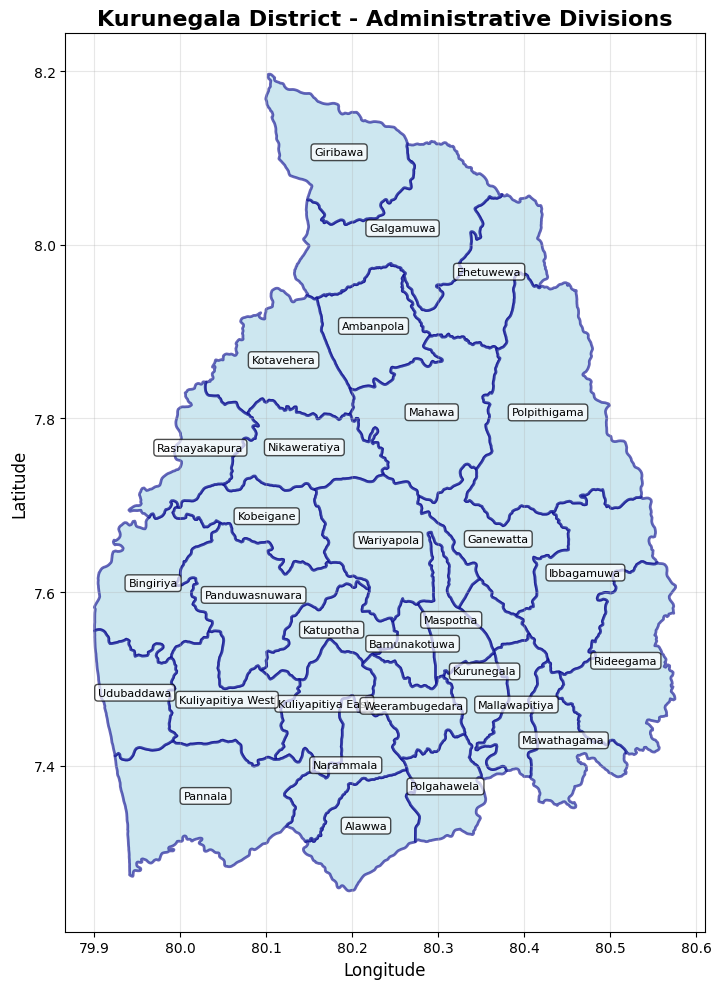

Total area: 0.4017 square degrees


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12176\4075309409.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f"Total area: {aoi.geometry.area.sum():.4f} square degrees")


In [5]:
# Visualize the Kurunegala district AOI
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

# Plot the AOI with divisions
aoi.plot(ax=ax, 
         edgecolor='darkblue', 
         facecolor='lightblue', 
         alpha=0.6,
         linewidth=2)

# Add division labels
for idx, row in aoi.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, 
            row['NAME_2'], 
            fontsize=8, 
            ha='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

ax.set_title('Kurunegala District - Administrative Divisions', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total area: {aoi.geometry.area.sum():.4f} square degrees")